In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
corolla=pd.read_csv("C:\ExcelR\Data Scientist\Multi Linear Regression\ToyotaCorolla.csv",encoding='unicode_escape')

In [4]:
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
corolla1=corolla.iloc[:,[2,3,6,8,12,13,15,16,17]]
corolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# EDA

In [7]:
corolla1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
corolla2=corolla1.rename({'Age_08_04':'Age','Quarterly_Tax':'QuarterTax'},axis=1)
corolla2

,Price,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
corolla_2=corolla2.drop_duplicates()
corolla_2

,Price,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
corolla2[corolla2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
corolla_2.isna().sum()

Price         0
Age           0
KM            0
HP            0
cc            0
Doors         0
Gears         0
QuarterTax    0
Weight        0
dtype: int64

# Correlation Matrix

In [12]:
corolla_2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QuarterTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


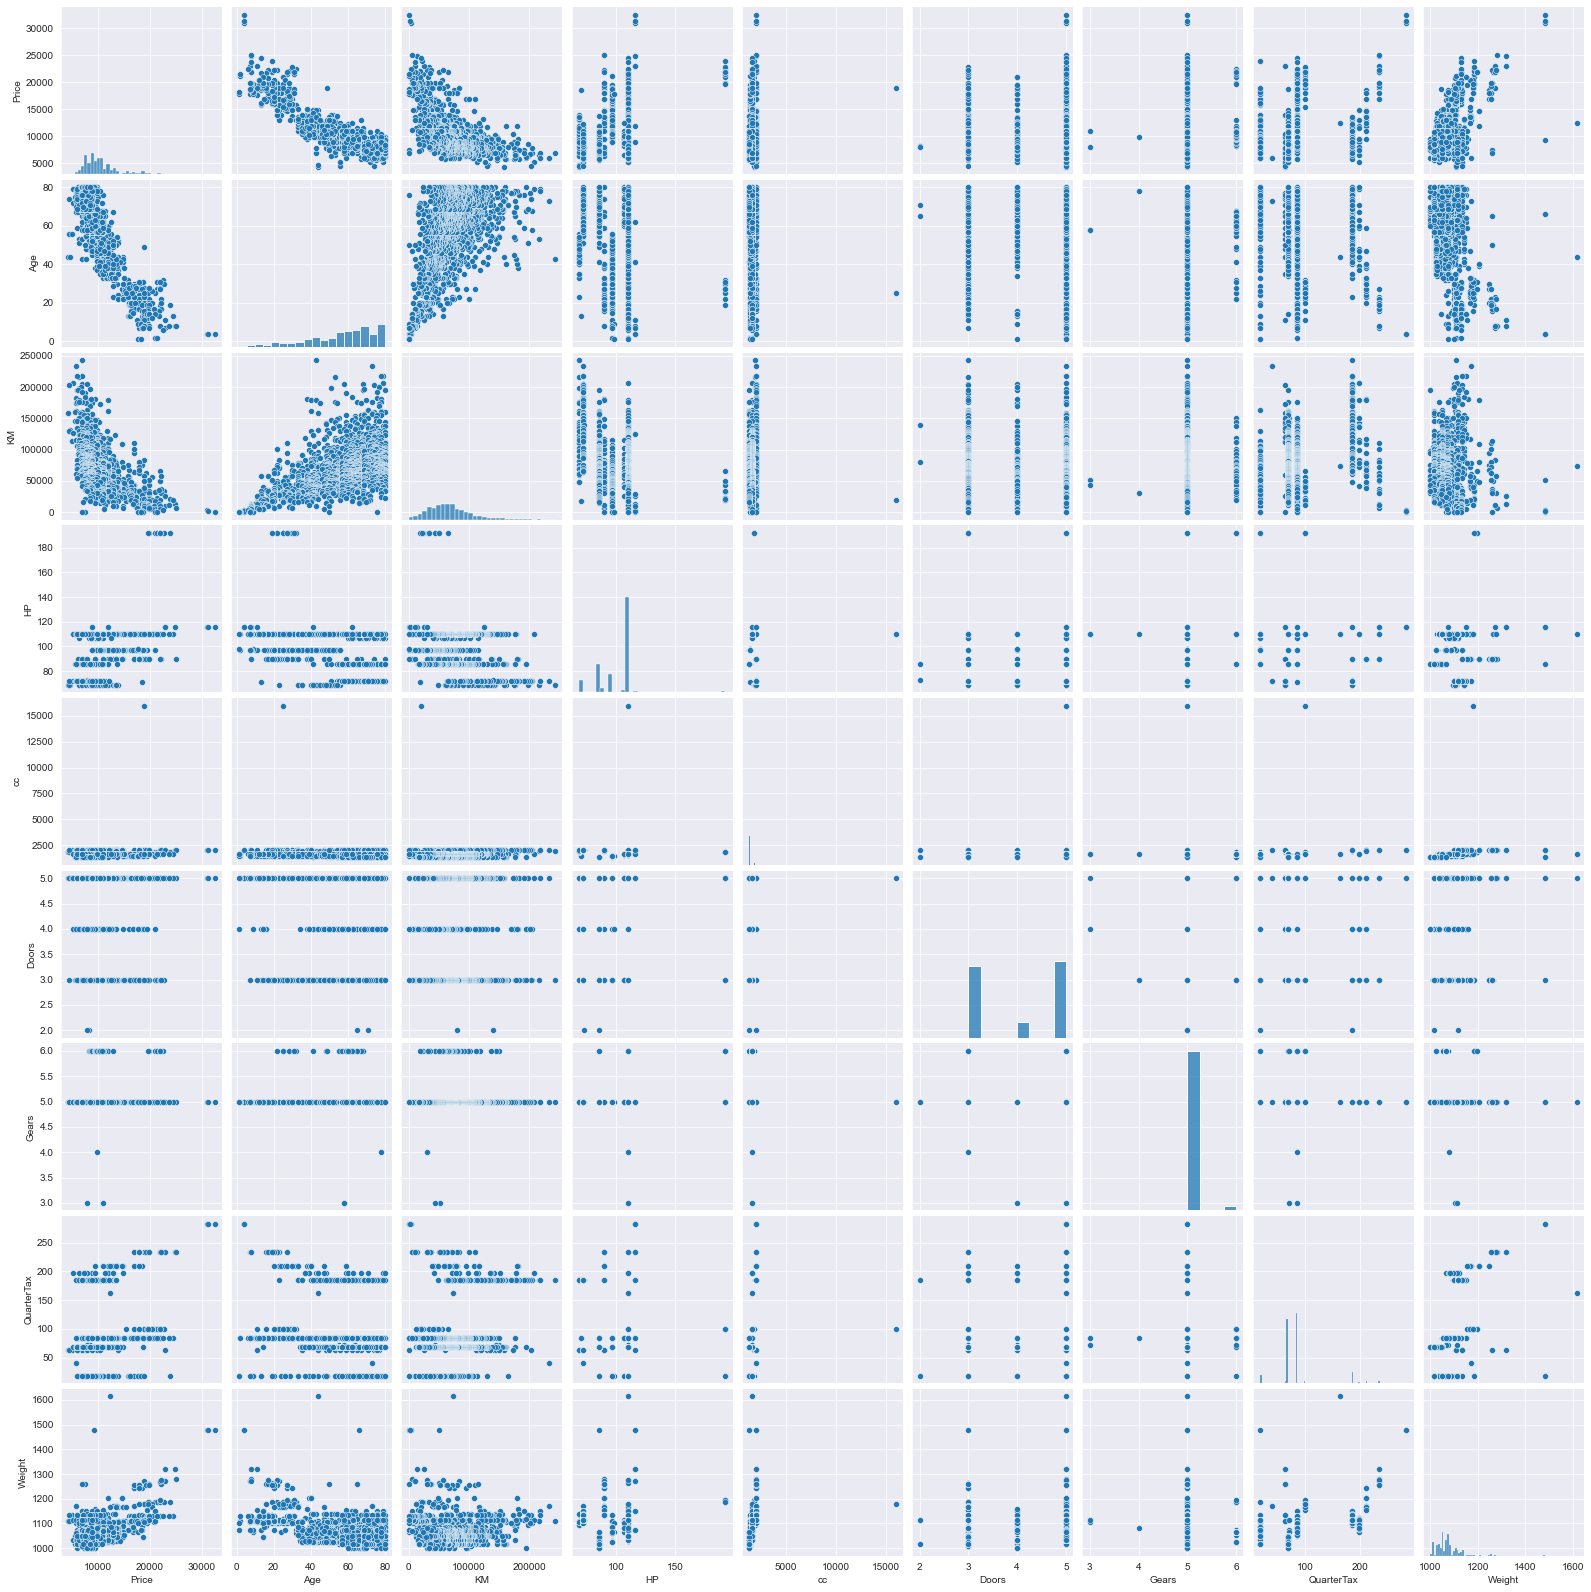

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla_2)

# Preparing a model

In [14]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterTax+Weight',data=corolla_2).fit()

In [15]:
model.params

Intercept    -5472.540368
Age           -121.713891
KM              -0.020737
HP              31.584612
cc              -0.118558
Doors           -0.920189
Gears          597.715894
QuarterTax       3.858805
Weight          16.855470
dtype: float64

In [16]:
print(model.tvalues, '\n', model.pvalues)

Intercept     -3.875273
Age          -46.551876
KM           -16.552424
HP            11.209719
cc            -1.316436
Doors         -0.023012
Gears          3.034563
QuarterTax     2.944198
Weight        15.760663
dtype: float64 
 Intercept      1.113392e-04
Age           1.879217e-288
KM             1.994713e-56
HP             5.211155e-28
cc             1.882393e-01
Doors          9.816443e-01
Gears          2.452430e-03
QuarterTax     3.290363e-03
Weight         1.031118e-51
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

# Calculating VIF

In [18]:
corolla_2.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterTax',
       'Weight'],
      dtype='object')

In [19]:
rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+QuarterTax+Weight',data=corolla_2).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('KM~Age+HP+cc+Doors+Gears+QuarterTax+Weight',data=corolla_2).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP~Age+KM+cc+Doors+Gears+QuarterTax+Weight',data=corolla_2).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QuarterTax+Weight',data=corolla_2).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QuarterTax+Weight',data=corolla_2).fit().rsquared  
vif_doors = 1/(1-rsq_doors) 

rsq_gears = smf.ols('Gears~Age+KM+HP+cc+Doors+QuarterTax+Weight',data=corolla_2).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 

rsq_qtax = smf.ols('QuarterTax~Age+KM+HP+cc+Doors+Gears+Weight',data=corolla_2).fit().rsquared  
vif_qtax = 1/(1-rsq_qtax) 

rsq_we = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QuarterTax',data=corolla_2).fit().rsquared  
vif_we = 1/(1-rsq_we) 


# Storing vif values in a data frame
d1 = {'Variables':['age','km','hp','cc','doors','gears','qtax','weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qtax,vif_we]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,qtax,2.295375
7,weight,2.487180


No variable has VIF>20, No collinearity

# Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


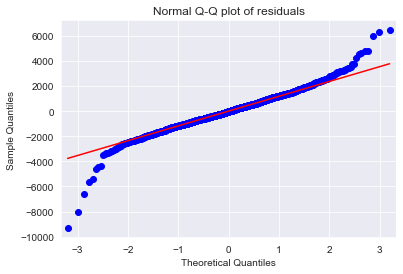

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

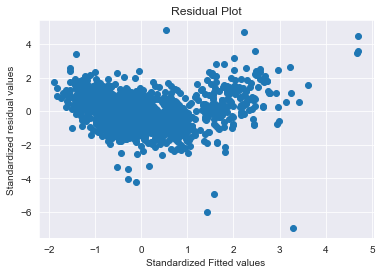

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

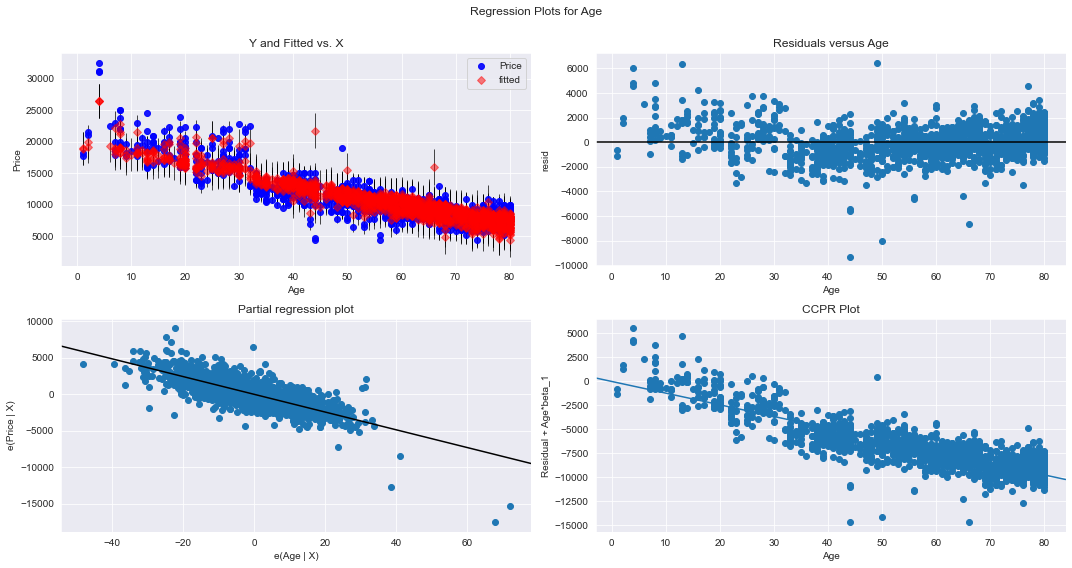

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

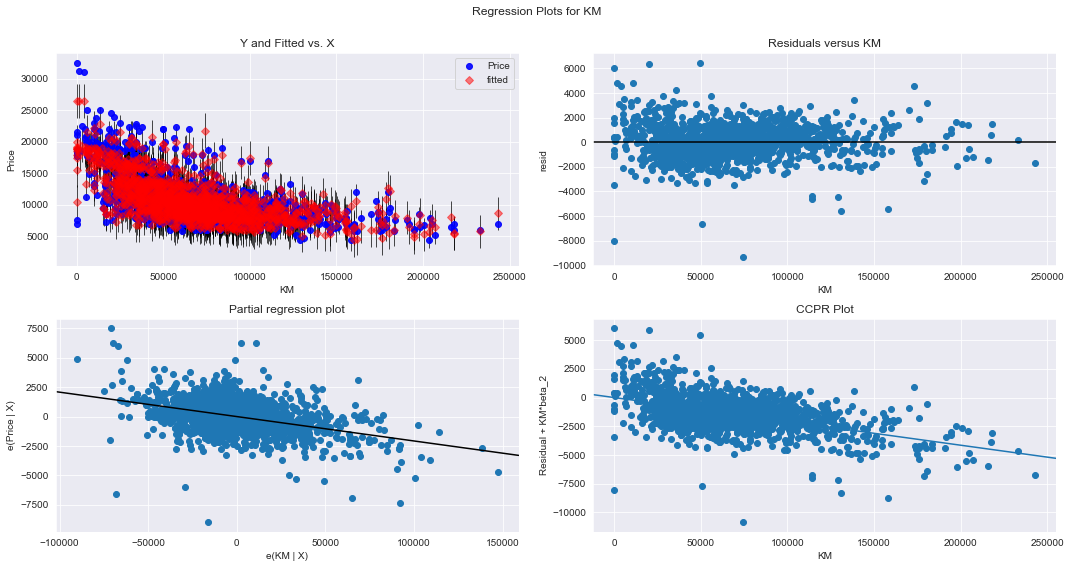

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

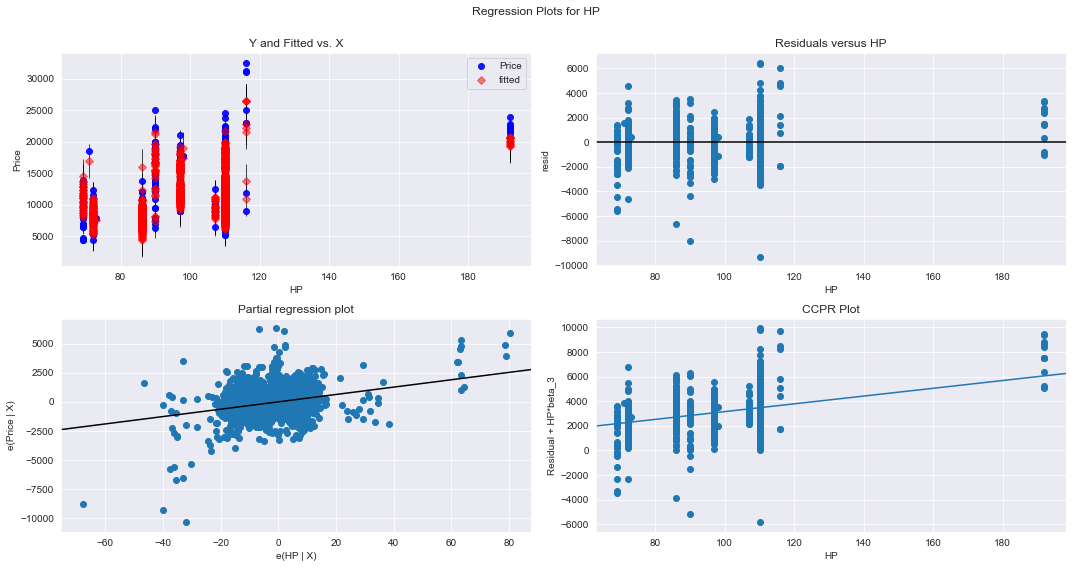

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

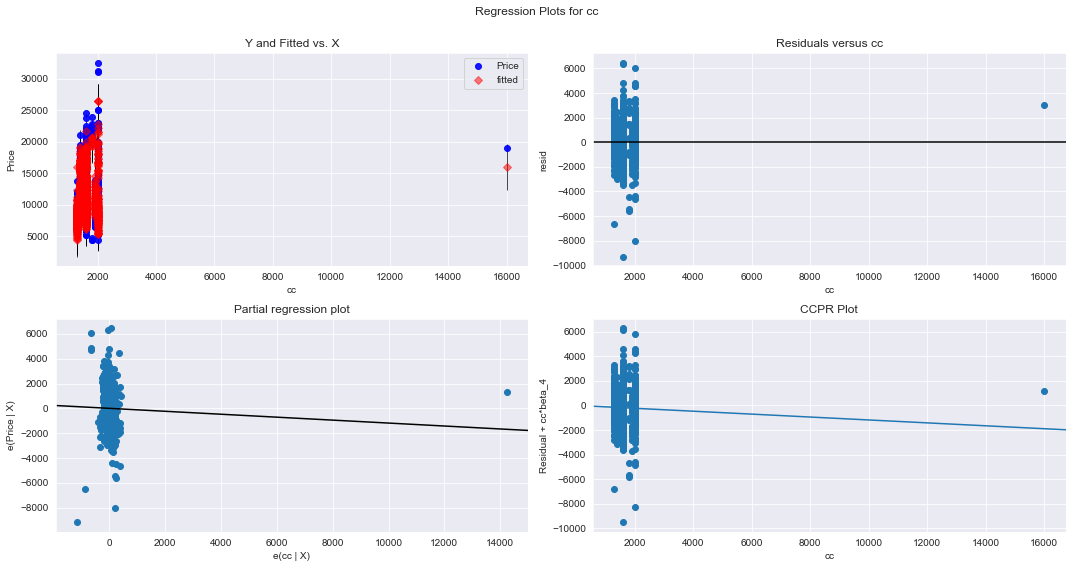

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

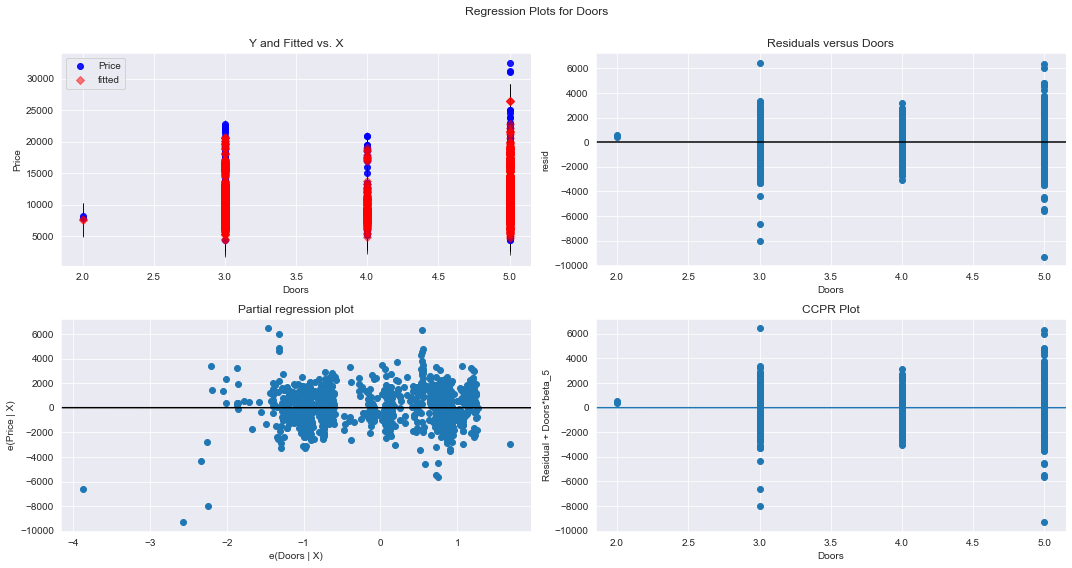

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

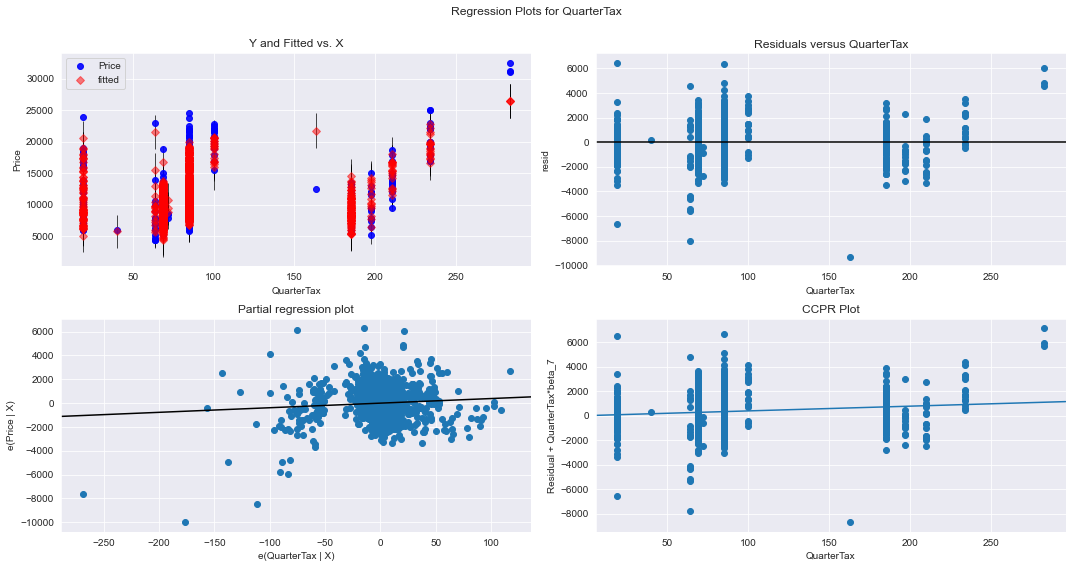

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QuarterTax", fig=fig)
plt.show()

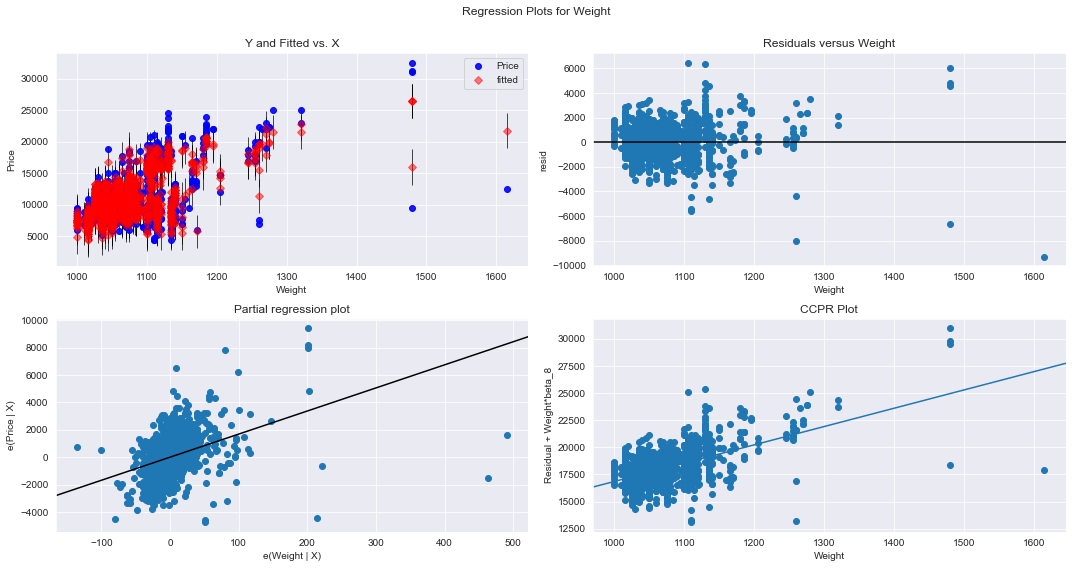

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/Outliers

Cook’s Distance

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

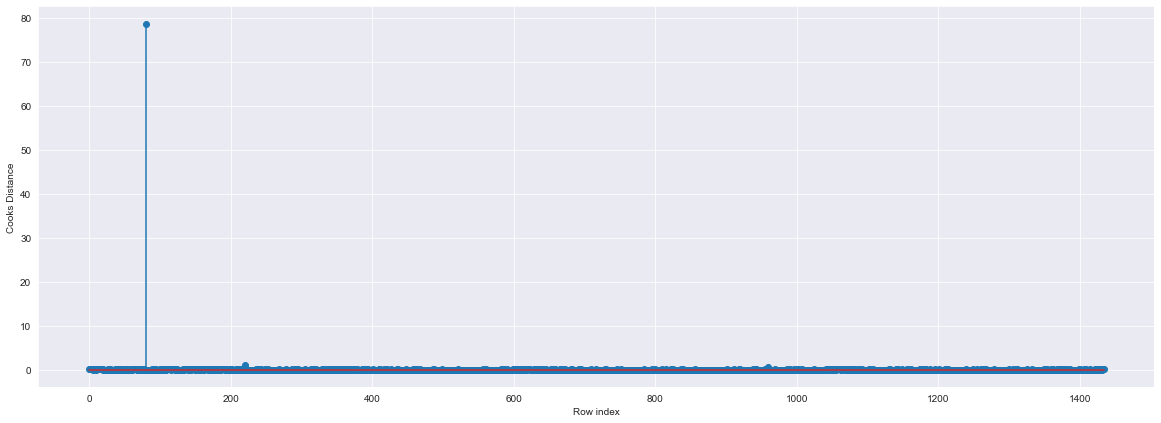

In [31]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

# High Influence points

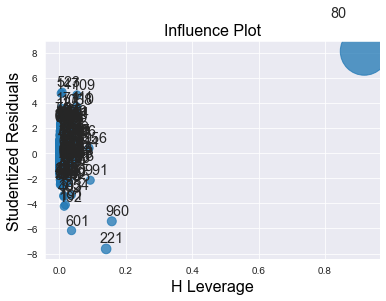

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k=corolla_2.shape[1]
n=corolla_2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [35]:
corolla_2[corolla_2.index.isin([80])] 

,Price,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [36]:
#Discard the data points which are influencers and reasign the row number (reset_index())
corolla_3=corolla_2.drop(corolla_2.index[[80]],axis=0).reset_index(drop=True)
corolla_3

,Price,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [37]:
final_model_1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterTax+Weight',data=corolla_3).fit()

In [38]:
(final_model_1.rsquared,final_model_1.aic)

(0.8681163912634053, 24669.363894157)

In [39]:
model_influence_1 = final_model_1.get_influence()
(c, _) = final_model_1.get_influence().cooks_distance

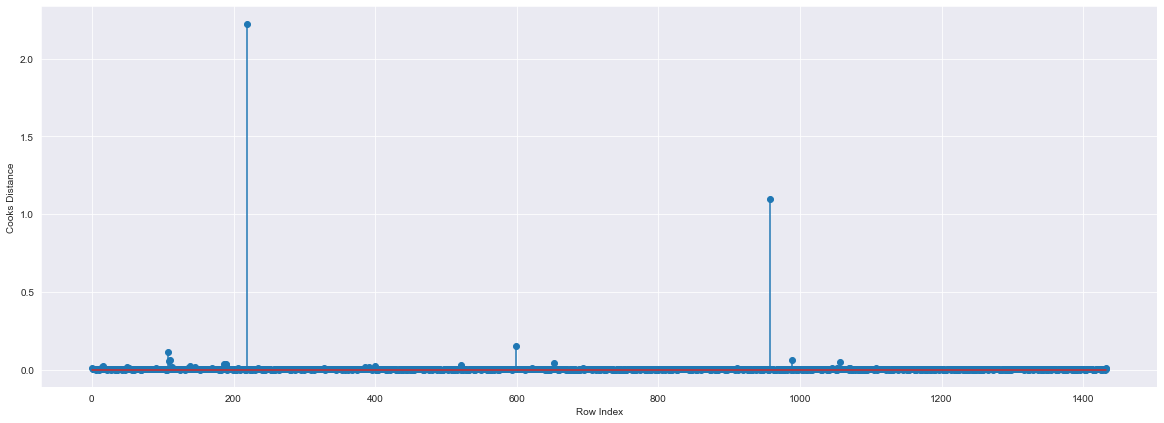

In [40]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(corolla_3)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(219, 2.2253513655270813)

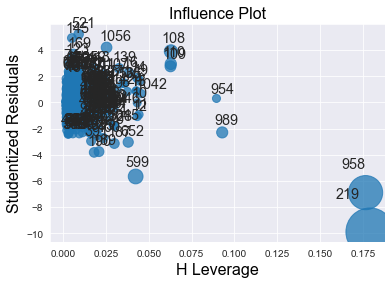

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model_1)
plt.show()

In [43]:
corolla_4=corolla_3.drop(corolla_3.index[[958,219]],axis=0).reset_index(drop=True)
corolla_4

,Price,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [44]:
final_model_2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterTax+Weight',data=corolla_4).fit()

In [45]:
(final_model_2.rsquared,final_model_2.aic)

(0.8839684606741538, 24453.23573612724)

In [46]:
model_influence_3 = final_model_2.get_influence()
(c, _) = final_model_2.get_influence().cooks_distance

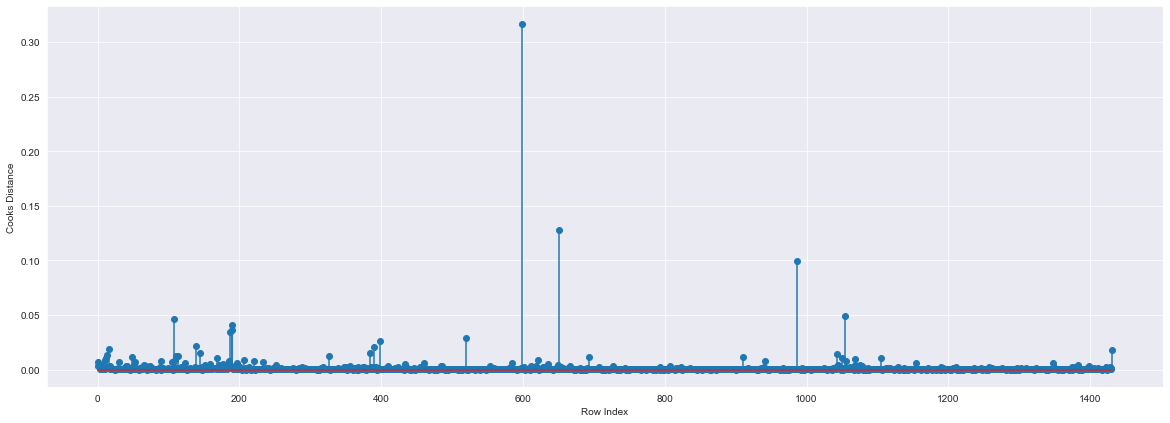

In [47]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(corolla_4)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

As value of max(c)<0.50, we can stop the process

# Predicting for new data

In [48]:
#New data for prediction
new_data=pd.DataFrame({'Age':23,"KM":46986,"HP":90,"cc":2000,"Doors":3,"Gears":5,"QuarterTax":210,"Weight":1165},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QuarterTax,Weight
0,23,46986,90,2000,3,5,210,1165


In [49]:
final_model_2.predict(new_data)

0    16326.634426
dtype: float64

In [50]:
pred_y=final_model_2.predict(corolla_4)
pred_y

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1427     9114.821644
1428     8499.169594
1429     8644.902871
1430     8758.662855
1431    10638.570082
Length: 1432, dtype: float64

# Table containing R^2 value for each prepared model

In [51]:
R2={'Prep_Models':['model','final_model_1','final_model_2'],'Rsquared':[model.rsquared,final_model_1.rsquared,final_model_2.rsquared]}
table=pd.DataFrame(R2)
table

,Prep_Models,Rsquared
0,model,0.862520
1,final_model_1,0.868116
2,final_model_2,0.883968
